## Bi-linear補完

(192, 192)
[[0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]
 [0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]
 [0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]
 ...
 [0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]
 [0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]
 [0.         0.66666667 0.33333333 ... 0.         0.66666667 1.33333333]]
(192, 192, 3)
[[[0.         0.         0.        ]
  [0.66666667 0.66666667 0.66666667]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.         0.         0.        ]
  [0.66666667 0.66666667 0.66666667]
  [1.33333333 1.33333333 1.33333333]]

 [[0.         0.         0.        ]
  [0.66666667 0.66666667 0.66666667]
  [0.33333333 0.33333333 0.33333333]
  ...
  [0.         0.         0.        ]
  [0.66666667 0.66666667 0.66666667]
  [1.33333333 1.33333333 1.33333333]]

 [[0.         0.         0.        ]
  [0.66666667 0.66666667 0.6666666

True

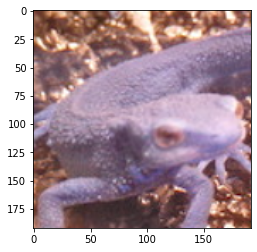

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Bi-Linear interpolation
def bi_interpolation(img, ax=1., ay=1.):
    H, W, C = img.shape
    
    aH = int(ay*H)
    aW = int(ax*W)
    
    # get position of resizd image
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    
    # get position of original position
    y = y/ay
    x = x/ax
    
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    
    ix = np.minimum(ix, W-2)  # shape-2にするのは最後の端っこを計算するときに？
    iy = np.minimum(iy, H-2)
    
    # get distance
    dx = x - ix
    dy = y - iy
    print(dx.shape)
    print(dx)
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    print(dx.shape)
    print(dx)
    
    # interpolation
    out = (1-dx)*(1-dy)*img[iy, ix] + dx*(1-dy)*img[iy, ix+1] + (1-dx)*dy*img[iy+1, ix]  + dx*dy*img[iy+1, ix+1]
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out



img = cv2.imread('../imori.jpg').astype(np.float)
out = bi_interpolation(img, ax=1.5, ay=1.5)

plt.imshow(out)
cv2.imwrite('out26.jpg', out)
